In [1]:
import numpy as np
import tensorflow as tf 
import gym 
import matplotlib.pyplot as plt
% matplotlib inline


# MsPacman Environment

[2017-07-23 18:25:37,496] Making new env: MsPacman-v0


Observation Shape: (210, 160, 3)
Number of actions: Discrete(9)


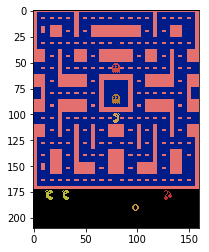

In [5]:
env = gym.make("MsPacman-v0")
obs = env.reset()
print('Observation Shape:', obs.shape)
print('Number of actions:', env.action_space)
plt.imshow(obs)

# Image Preprocessing 

Post process shape (86, 80, 3)


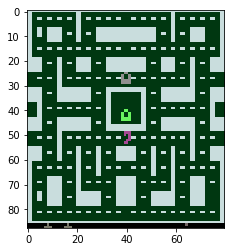

In [24]:
mspacman_colour = np.array([210, 164, 74]).mean()
def preprocess_obseration(obs):
    img = obs[1:176:2, ::2] # Crop and down size
    img = (img-128)/128 - 1 # Normalise
    # Could also reduce to grey scale if needed
    return img
    
example = preprocess_obseration(obs)
print('Post process shape', post.shape)
plt.imshow(example)

# Define hyperparameters

In [28]:
# input -> conv -> conv -> conv -> fc -> fc -> Q-values 

input_height, input_width, input_channels = post.shape
conv_n_maps = [32, 64, 64]
conv_kernel_sizes = [(8,8), (4,4), (3,3)]
conv_strides = [4, 2, 1]
conv_paddings = ["SAME"]*3
conv_activation = [tf.nn.relu]*3
n_hidden_in = 64 * input_height/8 * input_width/8
n_hidden = 512
hidden_activation = tf.nn.relu
n_outputs = env.action_space.n
initialiser = tf.contrib.layers.variance_scaling_initializer()

# Deep Q-Learning

In [29]:
def q_network(X_state, scope):
    prev_layer = x_state
    conv_layers = []
    with tf.variable_scope(scope):
        for n_maps, kernel_size, stride, padding, activation in zip(
            conv_n_maps, conv_kernel_sizes,
            conv_strides, conv_paddings, conv_activation):
            prev_layer = tf.contrib.layers.conv2d(prev_layer, num_outputs=n_maps,
                                                  kernel_size=kernel_size, stride=stride,
                                                 padding=padding, activation_fn =activation)
            conv_layers.append(prev_layer)
            last_conv_layer_flat = tf.reshape(prev_layer, shape=[-1, n_hidden_in])
            hidden = tf.contrib.layers.fully_connected(last_conv_layer_flat,
                                                       num_outputs=n_hidden,
                                                       activation_fn=hidden_activation,
                                                       weights_initializer=initialiser)
            outputs = tf.contrib.layers.fully_connected(hidden,n_outputs, activation_fn=None,
                                                        weights_initializer=initialiser)
            
            
            
    

In [ ]:
# Actor-critic we maintain two sets of parameters 
# Critic - Update action-value function parameters
# Actor - Updates policy parameters in direction suggested by critic 